In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']= 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [4]:
data = pd.read_csv('D:\Credit risk prediction\Credit_default_dataset.csv',sep=',')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Admin\AppData\Local\Temp\ipykernel_2212\839187925.py:1: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv('D:\Credit risk prediction\Credit_default_dataset.csv',sep=',')


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

**Binary classification**

In [6]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [7]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

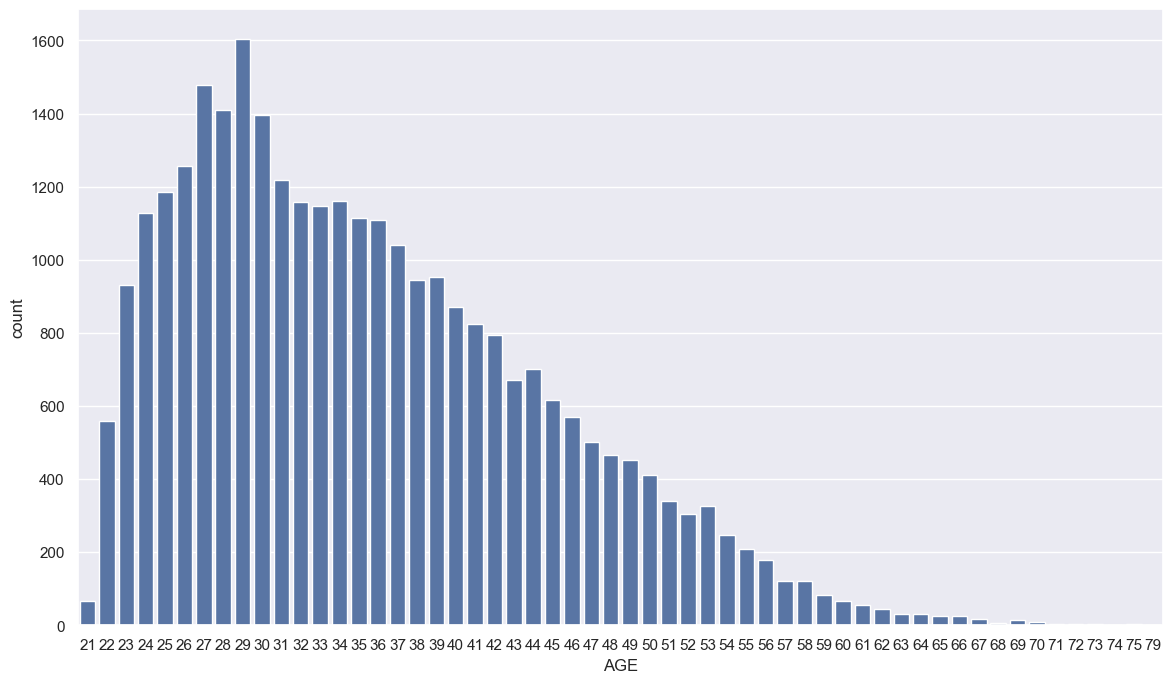

In [8]:
import seaborn as sns

# Set the Seaborn default theme and other settings
sns.set()

sns.countplot(x='AGE',data=data)

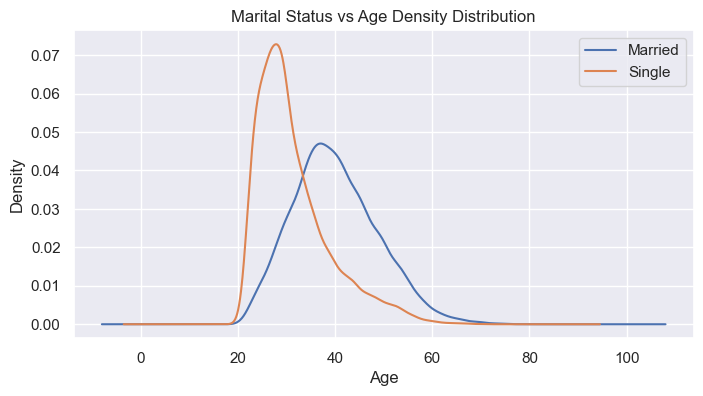

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4))

# Define labels for clarity
labels = {1: 'Married', 2: 'Single'}

for code in [1, 2]:
    subset = data[data['MARRIAGE'] == code]
    subset['AGE'].plot(kind='kde', label=labels[code])

plt.title('Marital Status vs Age Density Distribution')
plt.legend()
plt.xlabel('Age')
plt.show()


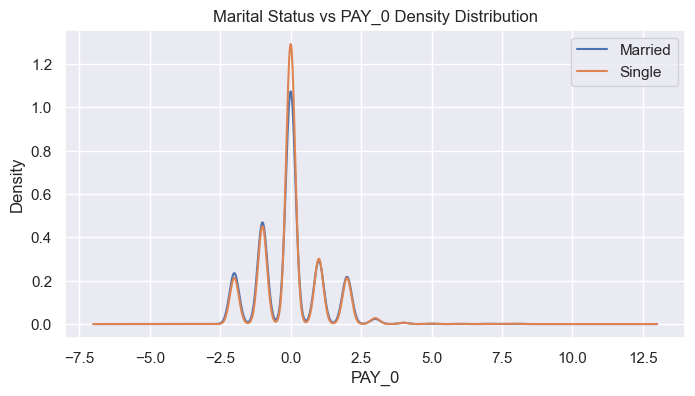

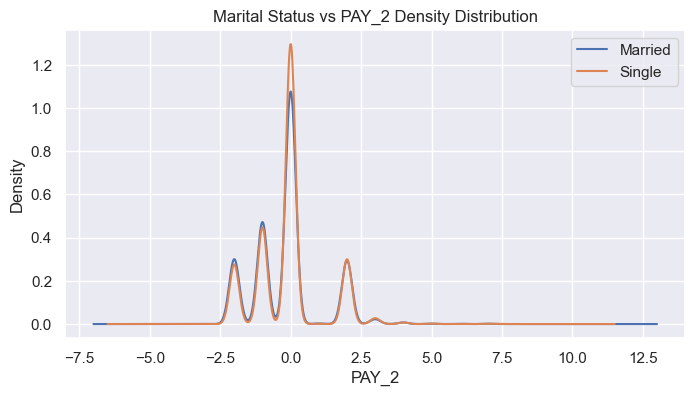

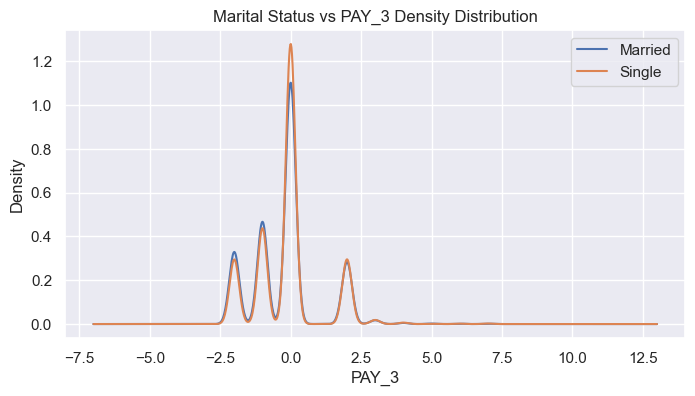

In [10]:
import matplotlib.pyplot as plt

# Define column names you want to plot
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3']
labels = {1: 'Married', 2: 'Single'}

# Loop through each PAY column and generate a KDE plot by MARRIAGE group
for col in pay_columns:
    plt.figure(figsize=(8, 4))
    
    for code in [1, 2]:
        subset = data[data['MARRIAGE'] == code]
        subset[col].plot(kind='kde', label=labels[code])
    
    plt.title(f'Marital Status vs {col} Density Distribution')
    plt.legend()
    plt.xlabel(col)
    plt.show()


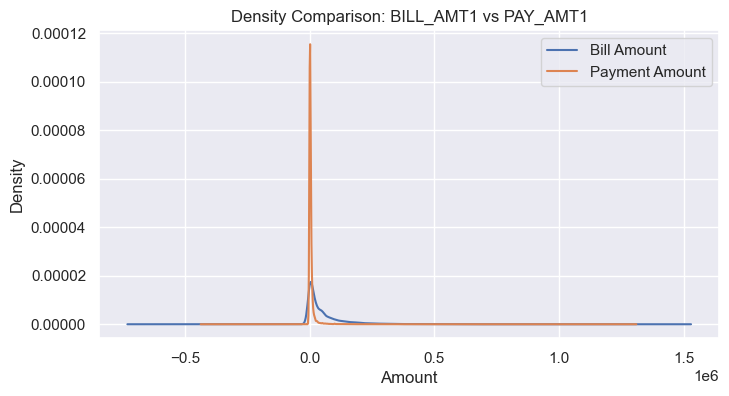

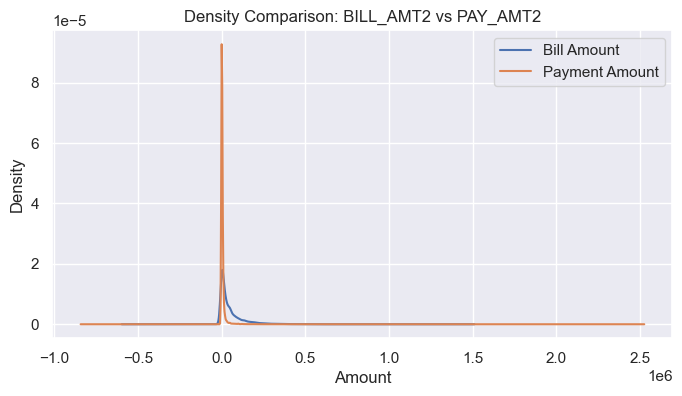

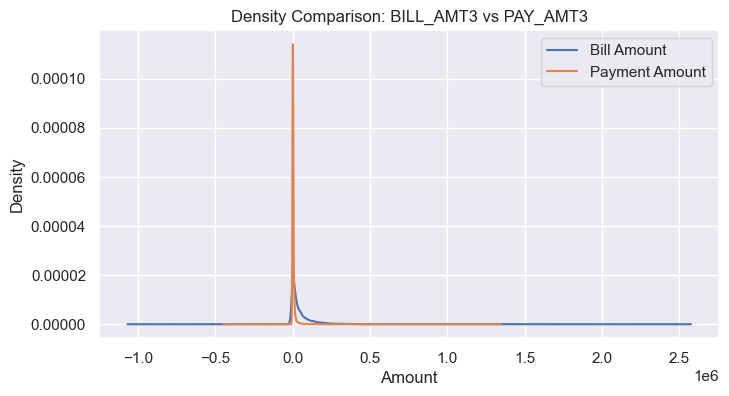

In [11]:
import matplotlib.pyplot as plt

# Define matching BILL and PAY columns (month-wise)
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']

# Plot KDEs for each bill vs pay pair
for bill_col, pay_col in zip(bill_columns, pay_columns):
    plt.figure(figsize=(8, 4))
    
    data[bill_col].plot(kind='kde', label='Bill Amount')
    data[pay_col].plot(kind='kde', label='Payment Amount')
    
    plt.title(f'Density Comparison: {bill_col} vs {pay_col}')
    plt.xlabel('Amount')
    plt.legend()
    plt.show()


<Axes: xlabel='SEX', ylabel='count'>

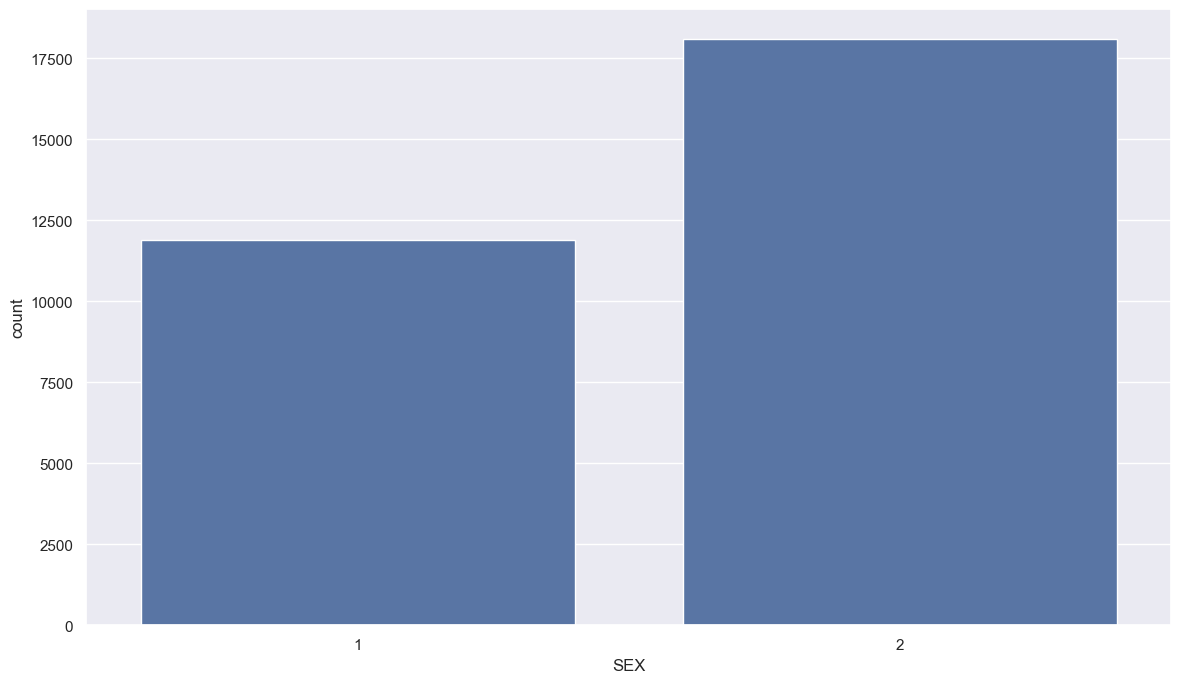

In [12]:
sns.countplot(x='SEX', data=data)

**Exploratory Data Analysis**

In [13]:
data.isnull().values.any()

np.False_

In [14]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<Figure size 1000x600 with 0 Axes>

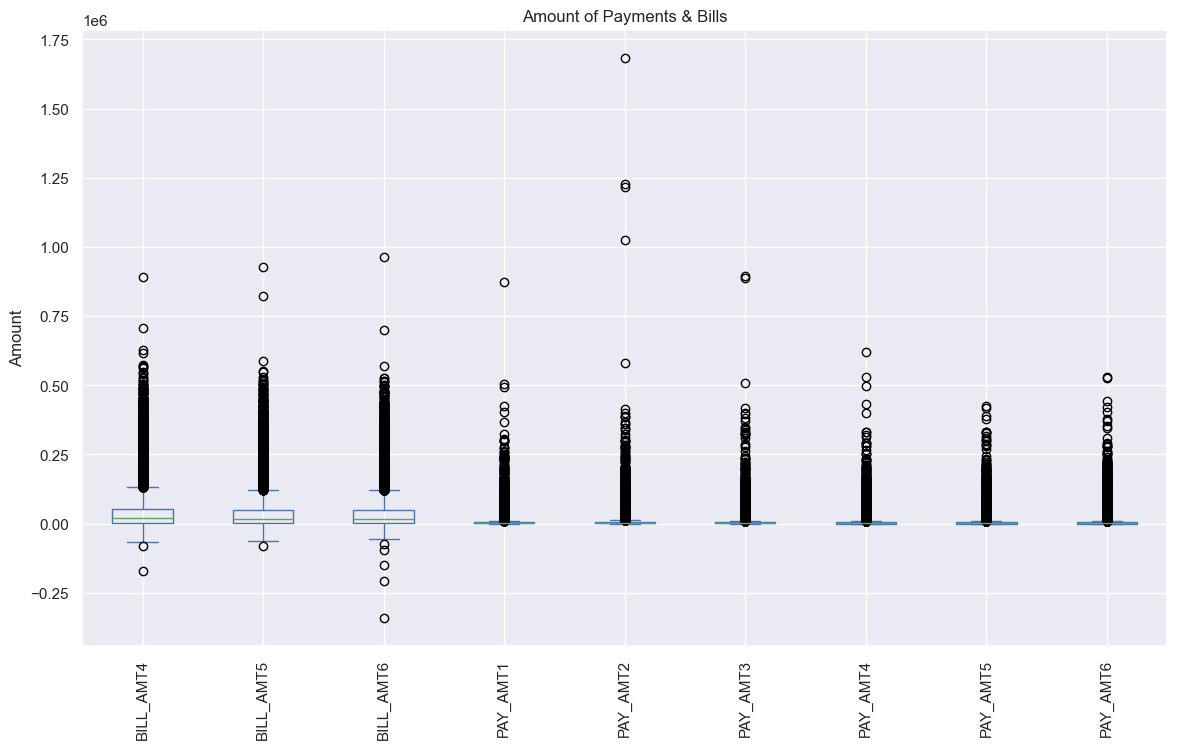

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the size by changing the width (10) and height (6)

# Plot the boxplot
data[['BILL_AMT4', 
     'BILL_AMT5', 
     'BILL_AMT6', 
     'PAY_AMT1', 
     'PAY_AMT2', 
     'PAY_AMT3', 
     'PAY_AMT4', 
     'PAY_AMT5', 
     'PAY_AMT6']].plot(kind='box')
plt.xticks(rotation = 90)

# plot with axis labels
plt.ylabel('Amount')  # Optional: Add y-axis label
plt.title('Amount of Payments & Bills')  # Optional: Add title

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2212\3786075914.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['LIMIT_BAL'], sort = True)


Text(0, 0.5, 'Frequency')

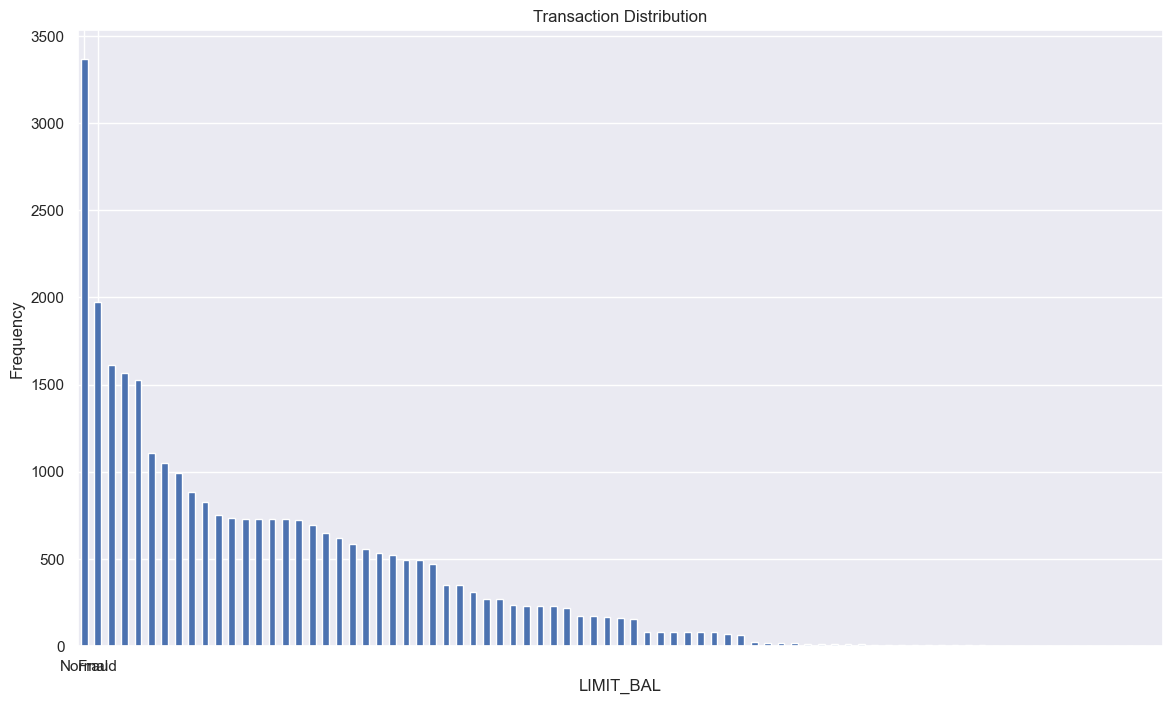

In [16]:
count_classes = pd.value_counts(data['LIMIT_BAL'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("LIMIT_BAL")

plt.ylabel("Frequency")

In [17]:
# Get the Fraud and the normal dataset 

fraud = data[data['LIMIT_BAL']==1]

normal = data[data['LIMIT_BAL']==0]

In [40]:
print(fraud.shape,normal.shape)

(0, 25) (0, 25)


In [18]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.BILL_AMT4.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: BILL_AMT4, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_2212\942828815.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


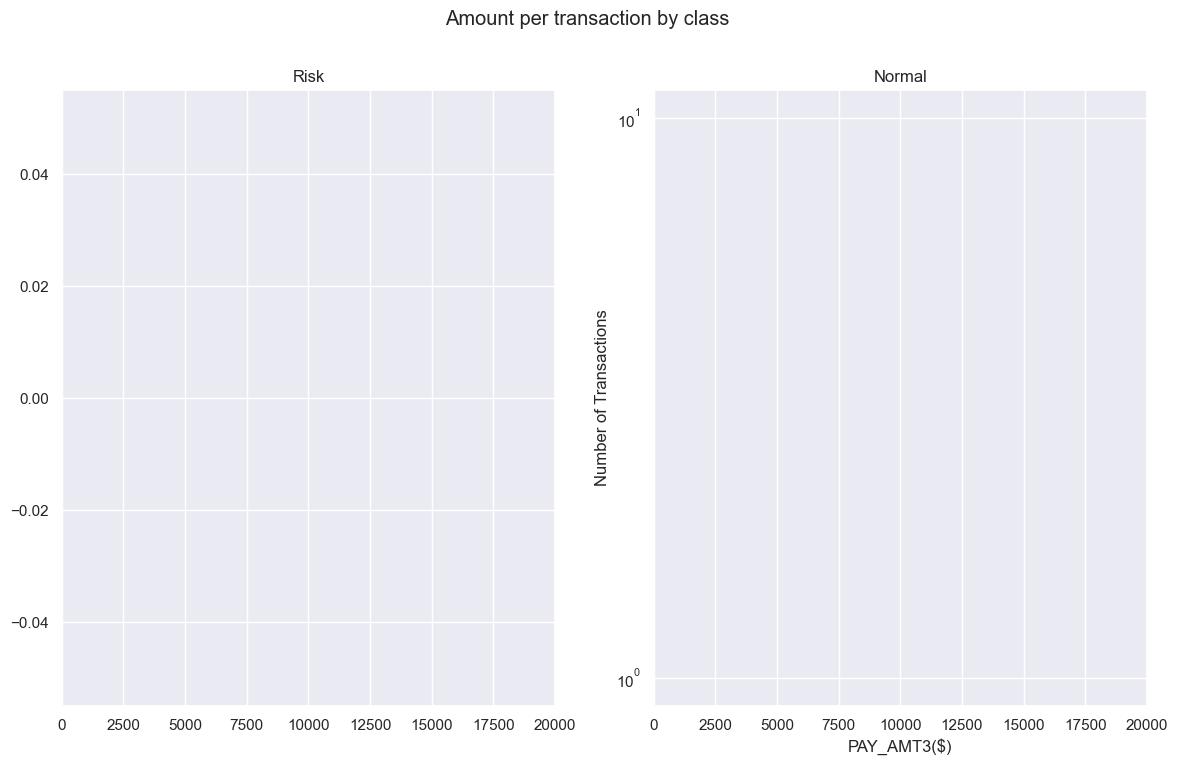

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.PAY_AMT3, bins = bins)
ax1.set_title('Risk')
ax2.hist(normal.PAY_AMT6, bins = bins)
ax2.set_title('Normal')
plt.xlabel('PAY_AMT3($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

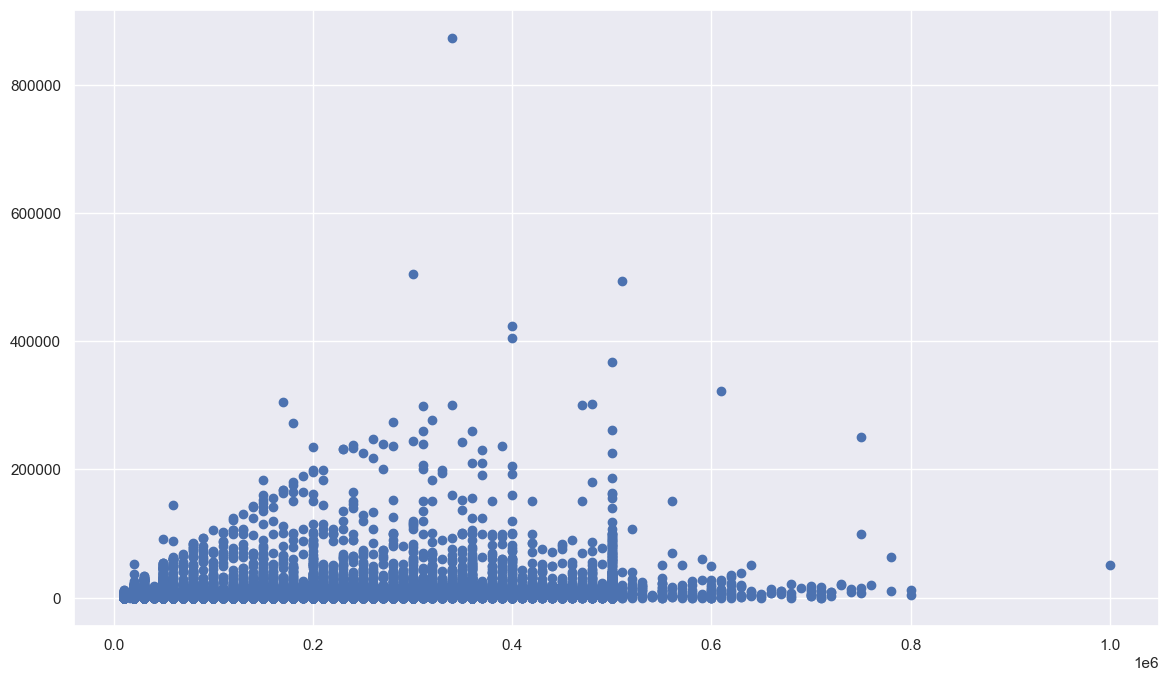

In [20]:
plt.scatter(data['LIMIT_BAL'], data['PAY_AMT1'])

In [21]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(3000, 25)

In [22]:

data.shape

(30000, 25)

In [90]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['default.payment.next.month']==1]

Valid = data1[data1['default.payment.next.month']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

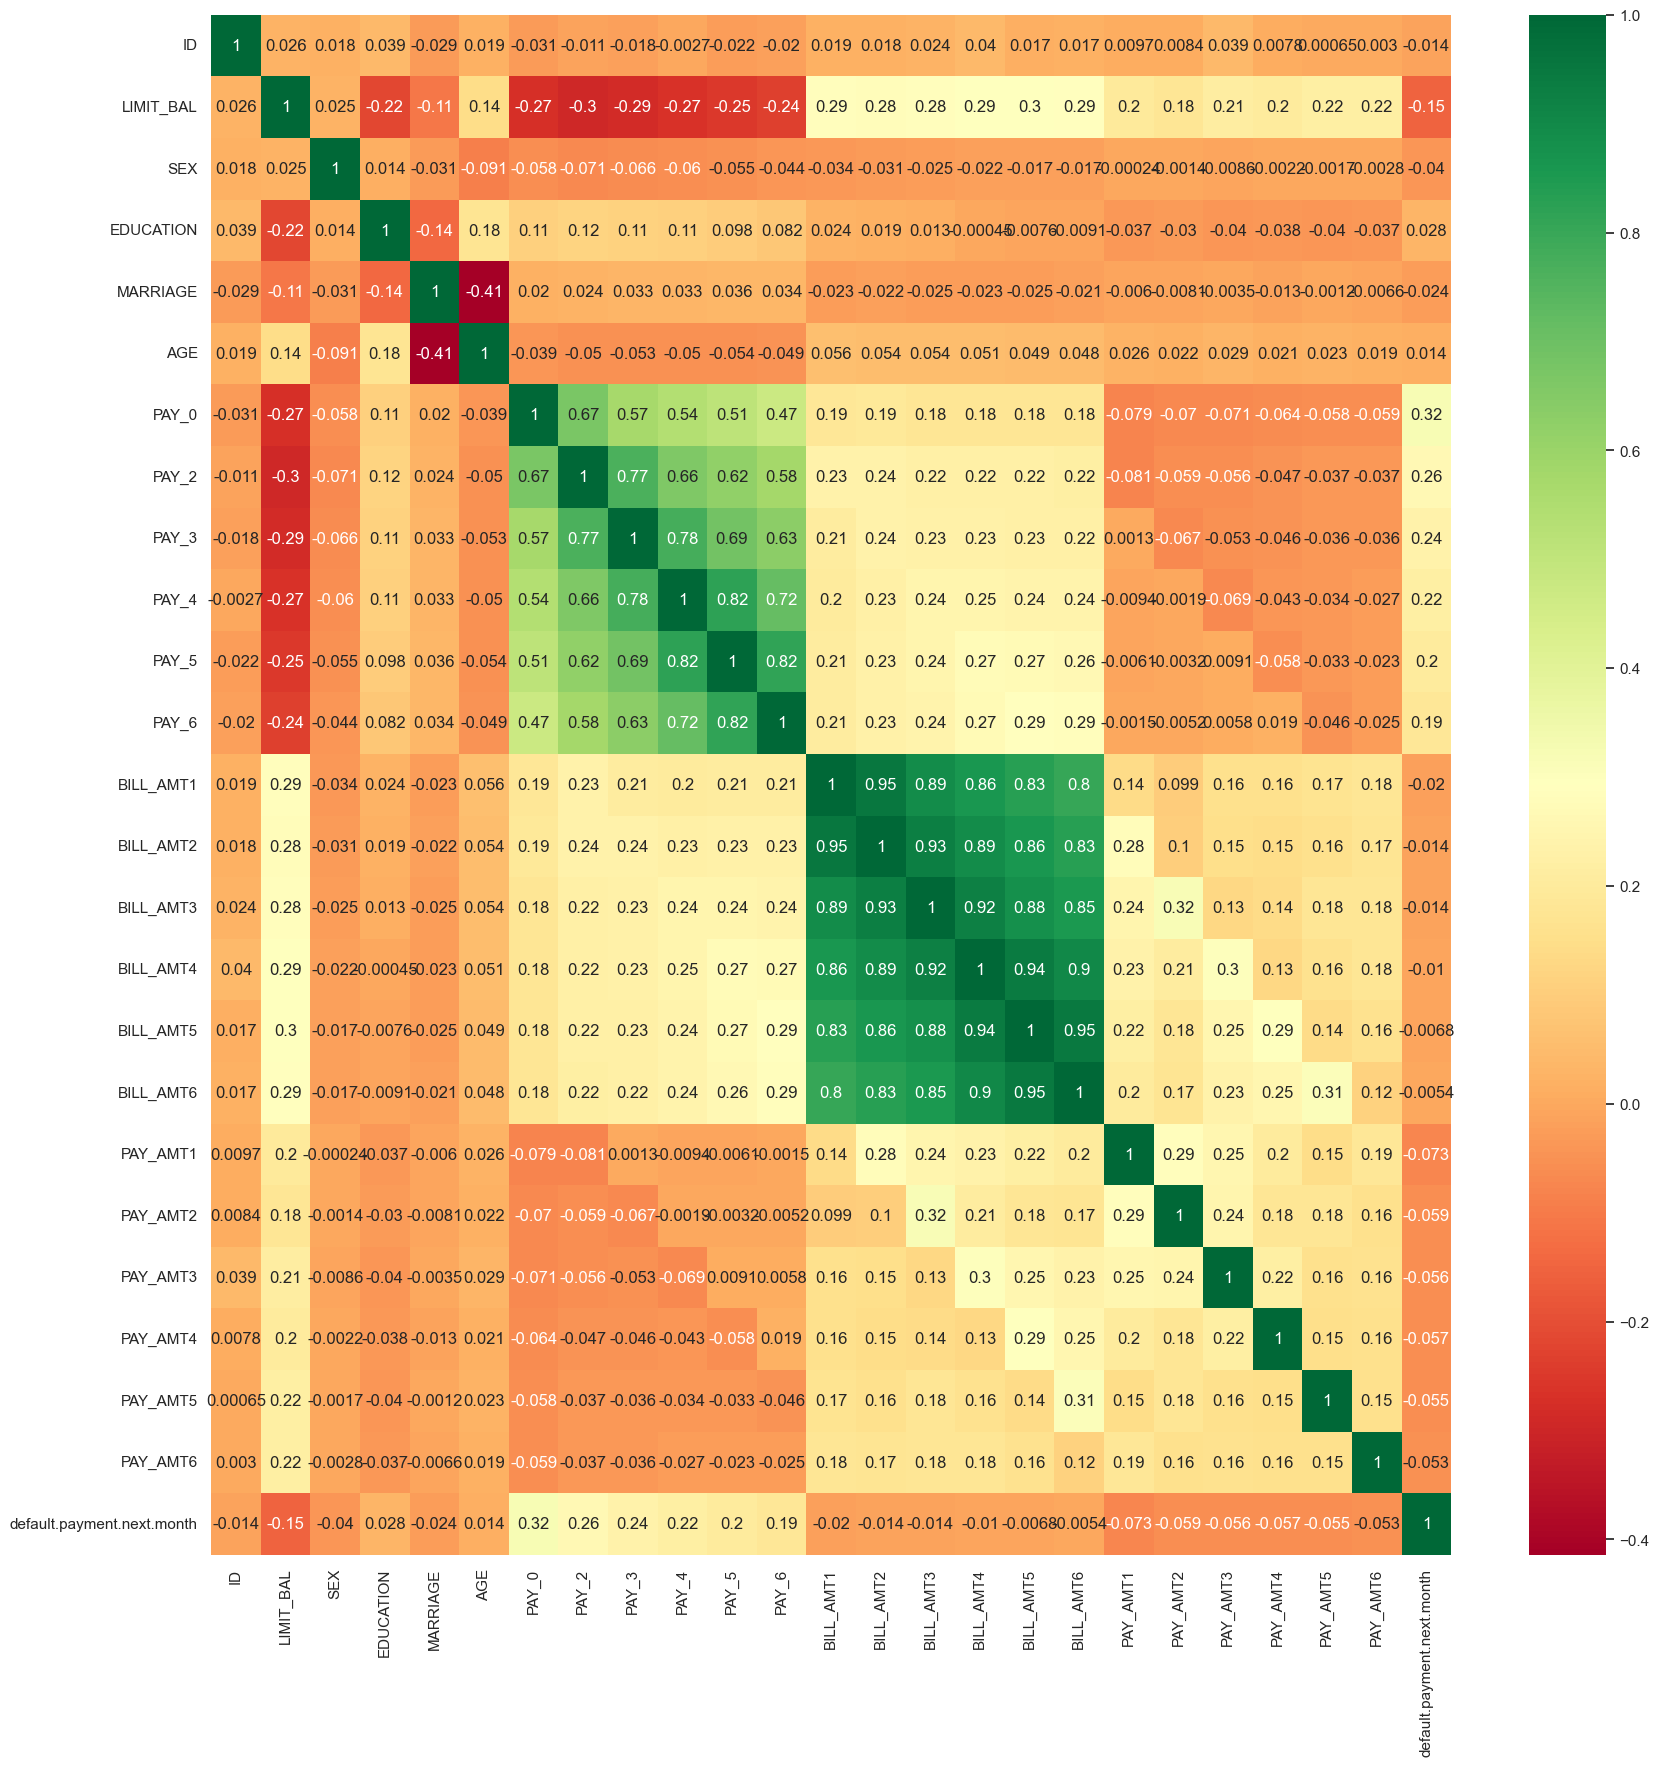

In [23]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [24]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["default.payment.next.month"]]
# Store the variable we are predicting 
target = "default.payment.next.month"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(3000, 24)
(3000,)


___Splitting and Training the data sets__ 

In [ ]:
x = data[['BILL_AMT4', 
          'BILL_AMT5', 
          'BILL_AMT6', 
          'PAY_AMT1', 
          'PAY_AMT2', 
          'PAY_AMT3', 
          'PAY_AMT4',
          'PAY_AMT5',
          'PAY_AMT6']]  

y = data['AGE']


In [32]:
x

,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...
29995,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [33]:
y

0        24
1        26
2        34
3        37
4        57
         ..
29995    39
29996    43
29997    37
29998    41
29999    46
Name: AGE, Length: 30000, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [41]:
len(x_train)

24000

In [42]:
len(x_test)

6000

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [44]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = clf.predict (x_test)

In [46]:
y_test

20412    26
1296     29
3906     33
20454    26
5200     34
         ..
28631    41
721      22
19990    32
14710    33
10011    29
Name: AGE, Length: 6000, dtype: int64

In [ ]:
#Accuracy
clf.score (x_test, y_test)

#Here is Accuracy 

0.04033333333333333

In [25]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Evalution Confusion Matrix**

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [48]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred, labels= clf.classes_)
print(cm)

[[ 0  2  1 ...  0  0  0]
 [ 1  5 14 ...  0  0  0]
 [ 0 10 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


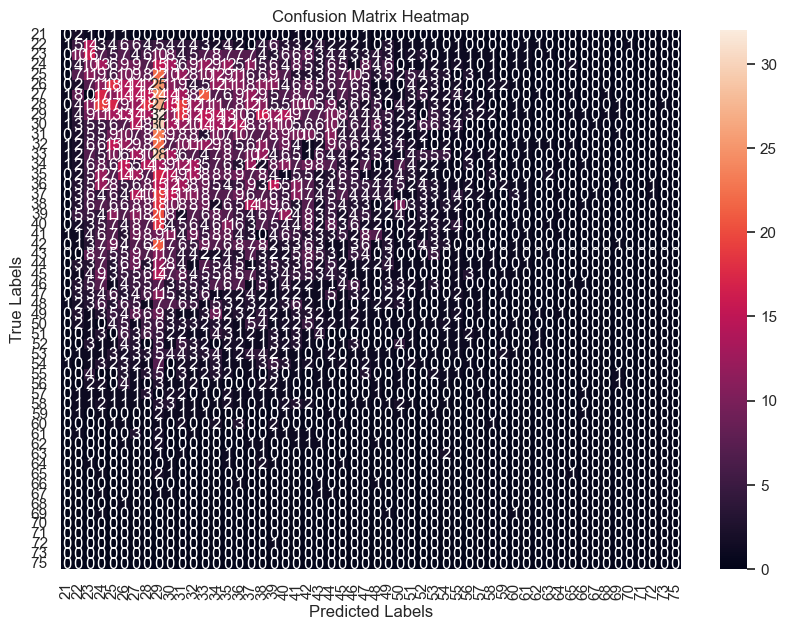

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)  # Corrected yticks

plt.title('Confusion Matrix Heatmap')  
plt.xlabel('Predicted Labels')  
plt.ylabel('True Labels')  
plt.show() 

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          21       0.00      0.00      0.00         7
          22       0.05      0.05      0.05       111
          23       0.09      0.09      0.09       183
          24       0.06      0.06      0.06       224
          25       0.03      0.02      0.03       249
          26       0.06      0.05      0.06       261
          27       0.05      0.05      0.05       285
          28       0.07      0.06      0.07       301
          29       0.06      0.09      0.07       337
          30       0.05      0.05      0.05       280
          31       0.03      0.04      0.03       218
          32       0.05      0.05      0.05       225
          33       0.02      0.02      0.02       224
          34       0.03      0.03      0.03       225
          35       0.04      0.04      0.04       212
          36       0.03      0.02      0.02       222
          37       0.03      0.03      0.03       233
          38       0.06    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

**--Grid Search--**

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier  

parameters = {'max_depth': [10, 5], 'max_features': ["sqrt", "log2"]}

tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters)
clf.fit(x_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 5],
                         'max_features': ['sqrt', 'log2']})

In [53]:
y_pred = clf.predict(x_test)  
print(y_pred)

[37 29 30 ... 28 29 24]


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          21       0.00      0.00      0.00         7
          22       0.00      0.00      0.00       111
          23       0.05      0.26      0.09       183
          24       0.05      0.06      0.05       224
          25       0.04      0.05      0.05       249
          26       0.00      0.00      0.00       261
          27       0.05      0.11      0.06       285
          28       0.04      0.02      0.03       301
          29       0.07      0.45      0.11       337
          30       0.05      0.16      0.07       280
          31       0.00      0.00      0.00       218
          32       0.00      0.00      0.00       225
          33       0.00      0.00      0.00       224
          34       0.00      0.00      0.00       225
          35       0.05      0.04      0.04       212
          36       0.00      0.00      0.00       222
          37       0.05      0.05      0.05       233
          38       0.00    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

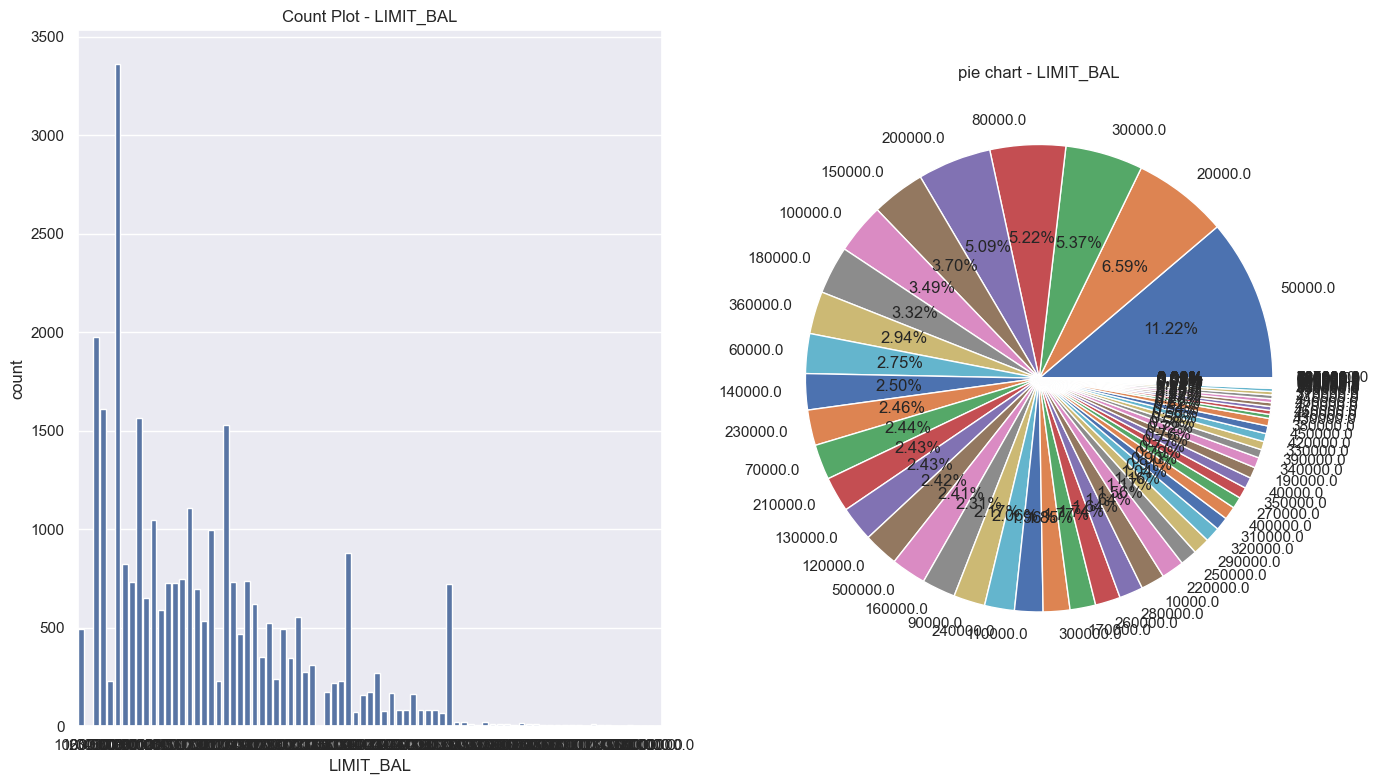

In [62]:
#Multi Variate Analysis

variable = 'LIMIT_BAL'
plt.figure (figure = (7,6))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= data)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts=data[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')


plt.tight_layout()

plt.show()

In [55]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


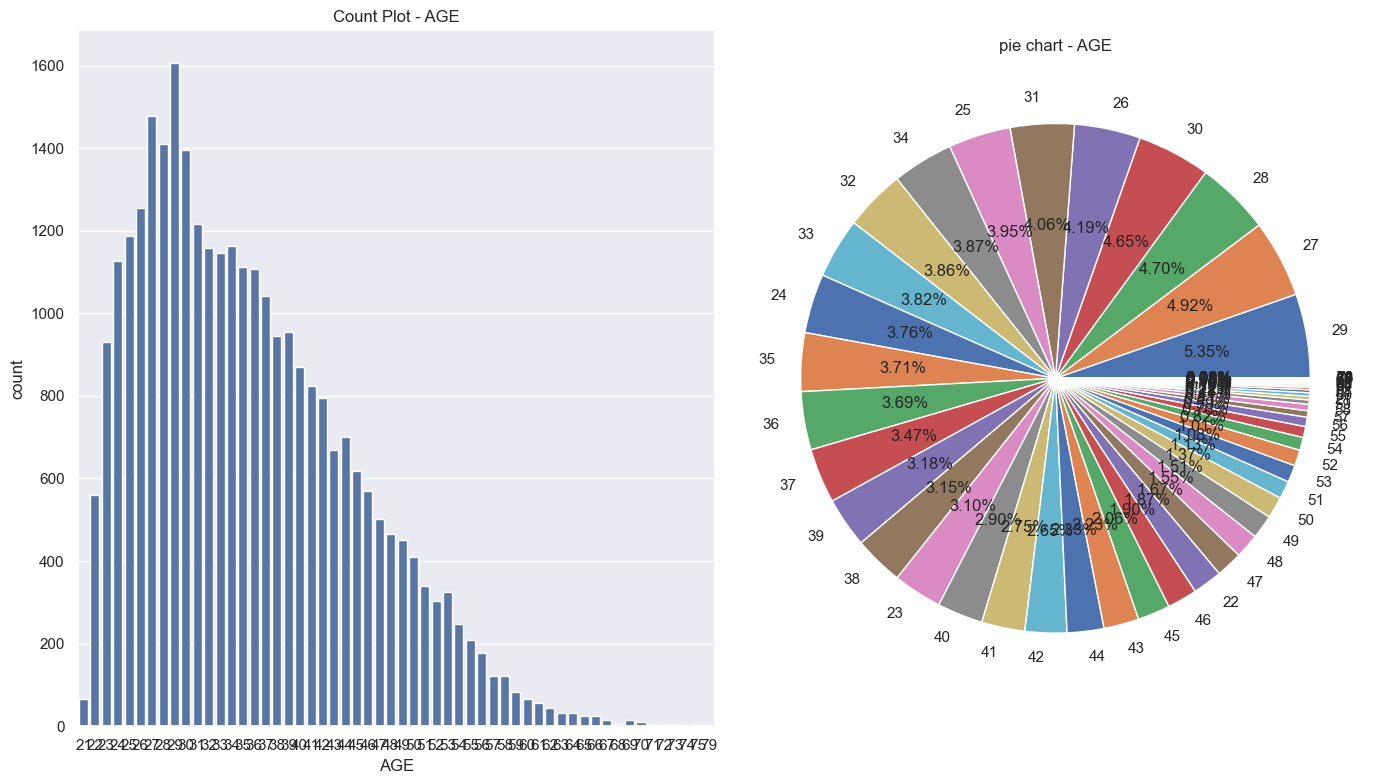

In [59]:
#UNI Variate Analysis 

variable = 'AGE'
plt.figure (figure = (6,5))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= data)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts=data[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

plt.tight_layout()
plt.show()

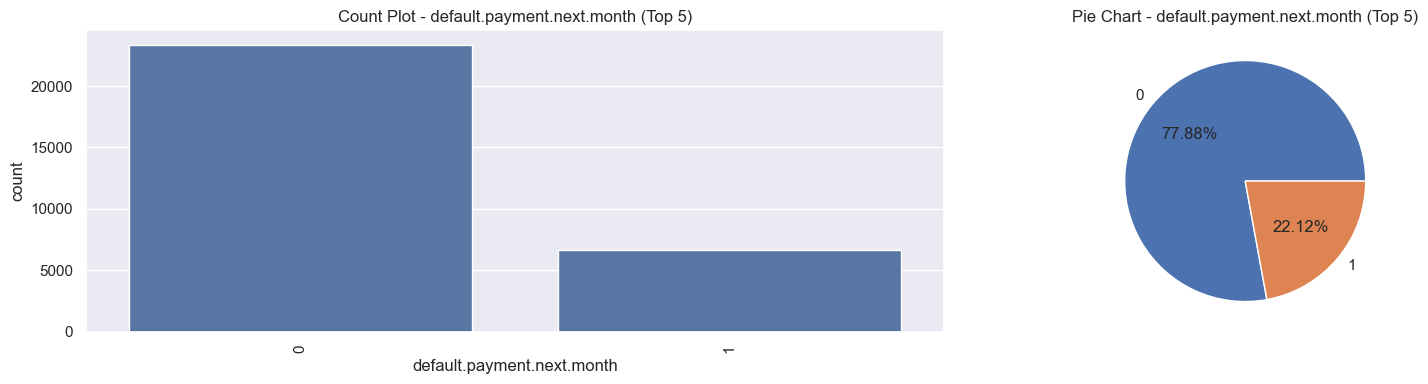

In [60]:
#Multi Variate Analysis
variable = 'default.payment.next.month'

# Get the top 5 values from the 'Metric tons of CO2e per capita (1990)
top_5_values = data[variable].value_counts().nlargest(5).index

df_top_5 = data[data[variable].isin(top_5_values)]

plt.figure(figsize=(17, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_top_5, order=top_5_values)
plt.title(f'Count Plot - {variable} (Top 5)')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_top_5[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable} (Top 5)')

plt.tight_layout()

plt.show()

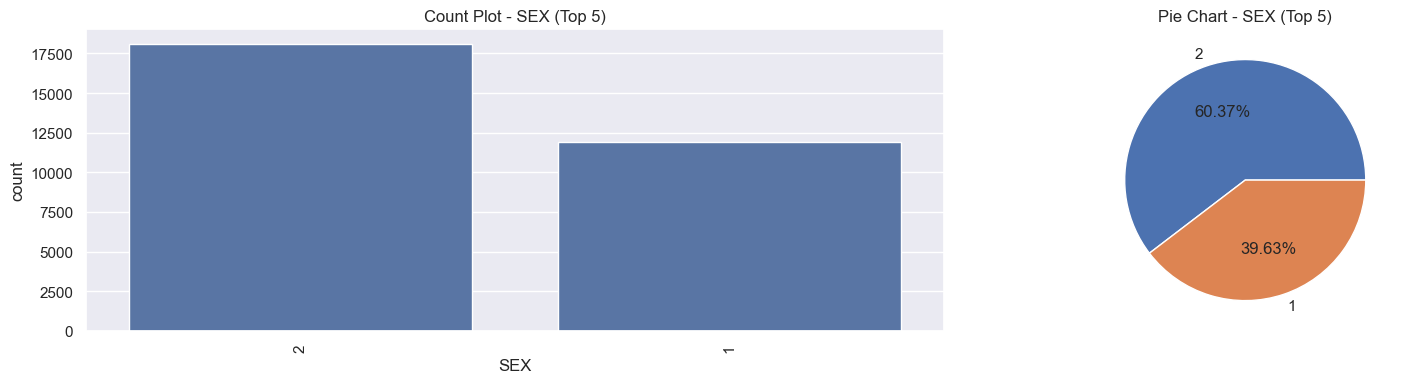

In [61]:
#Multi Variate Analysis
variable = 'SEX'

# Get the top 5 values from the 'Metric tons of CO2e per capita (1990)
top_5_values = data[variable].value_counts().nlargest(5).index

df_top_5 = data[data[variable].isin(top_5_values)]

plt.figure(figsize=(17, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_top_5, order=top_5_values)
plt.title(f'Count Plot - {variable} (Top 5)')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_top_5[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable} (Top 5)')

plt.tight_layout()

plt.show()